In [ ]:
!pip install qiskit
!pip install qiskit_ibm_provider
!pip install pylatexenc
!pip install --upgrade qiskit[visualization]
!pip install qiskit_ibm_runtime

In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-transpiler-service
!pip install qiskit_aer
!pip install qiskit_ibm_runtime

In [ ]:
!pip install matplotlib

 In general, $2+3/2log_2 N$ qubits are needed to factor the composite integer N, meaning at least 1154 qubits would be needed to factor RSA-768above.

The number theory that underlines Shor's algorithm relates to periodic modulo sequences.

Example (Power of 2's):

$[1,2,4,8,16,32,64,128,256,512,1024]$

mod all by 15

$[1mod15,2mod15,4mod15,8mod15,16mod15,32mod15,64mod15,128mod15,256mod15,512mod15,1024mod15] = [1,2,4,8,1,2,4,8,1,2,4]$

We can see that there is a periodic sequence of four [1,2,4,8]





Normal Schors Algorithm:

Assume N has only 2 distinct primes
$N = pq$

1. pick a random integer between 1->N.
2. Compute gcd(x,N) using euclidian algorithm
3. Find where x and N are coprime (i.e. gcd(x,N))
4. Using a period finding algorithm find for which x's the period (r) is even (brute force)
5. compute p and q: $gcd(x^{r/2}\pm 1, N)$ as long as $x^{r/2}\neq\pm1$

| x  | $( x^a \mod 15 )  $              | Period \( r \) | $( \text{gcd}(x^{r/2}-1,15)$ | $( \text{gcd}(x^{r/2} + 1, 15)$ |
|----|----------------------------------|----------------|------------------------------------|------------------------------------|
|----|---------------------------------|------------|----------------------------------|-----------------------------------|
| 2  | 1, 2, 4, 8, 1, 2, 4, 8, ...     | 4          | 3                        | 5                        |
| 4  | 1, 4, 1, 4, 1, 4, 1, 4, ...     | 2          | 3                        | 5                        |
| 7  | 1, 7, 4, 13, 1, 7, 4, 13, ...   | 4          | 3                        | 5                        |
| 8  | 1, 8, 4, 2, 1, 8, 4, 2, ...     | 4          | 3                        | 5                        |
| 11 | 1, 11, 1, 11, 1, 11, 1, 11, ... | 2          | 5                        | 3                        |
| 13 | 1, 13, 4, 7, 1, 13, 4, 7, ...   | 4          | 3                        | 5                        |


## Shors Algorithm Classically computated

In [57]:
import random


def shor_find_order_classical(a: int, product: int) -> int:
    exp = 1
    for r in range(1, product):
        exp *= a
        exp %= product
        if exp == 1:
            return r
    raise "Shor Classical Failed"


def shor_find_factor(product):
    # https://en.wikipedia.org/wiki/Shor%27s_algorithm
    if product % 2 == 0:
        return 2
    while True:
        # Pick a random number 1 < a < N {\displaystyle 1<a<N}.
        a = random.randrange(2, product - 1)
        print(f"Trying shor again, a={a}")
        K = gcd(a, product)
        if K != 1:
            return K
        # print(f"K is {K}")
        r = shor_find_order_classical(a, product)
        # print(f"R is {r}")
        # If r {\displaystyle r} is odd, then go back to step 1.
        if r % 2 == 1:
            # print("R is odd")
            continue
        # Compute g = gcd ( N , a r / 2 + 1 ) {\displaystyle g=\gcd(N,a^{r/2}+1)}. If g {\displaystyle g} is nontrivial, the other factor is N g {\textstyle {\frac {N}{g}}}, and we're done. Otherwise, go back to step 1.
        g = gcd(product, a ^ int(r / 2) + 1)
        # print(f"g is {g}")
        # Is g trivial
        if g == 1 or g == product:
            # print("g is so trivial")
            continue
        return g


def gcd(a: int, b: int) -> int:
    while a != 0:
        c = a
        a = b % a
        b = c
    return b


def find_factor(product: int) -> int:
    """
    :param product:
    :return: A factor of param, or -1 if prime
    """
    if product < 2:
        raise ":("

    for a in range(2, product):
        for b in range(a, product):
            if a * b == product:
                return a
    return -1


if __name__ == '__main__':
    find = 227119 # 49414657
    print(f"A factor is {find_factor(find)}")
    print(f"GCD is {gcd(116158341, 2009136727)}")
    print(f"shors {shor_find_factor(find)}")

A factor is 383
GCD is 13
Trying shor again, a=210102
Trying shor again, a=12465
Trying shor again, a=56253
Trying shor again, a=95522
Trying shor again, a=104462
Trying shor again, a=22299
Trying shor again, a=44909
Trying shor again, a=27081
Trying shor again, a=5375
Trying shor again, a=155093
Trying shor again, a=69886
Trying shor again, a=82487
Trying shor again, a=84746
Trying shor again, a=162897
Trying shor again, a=148675
Trying shor again, a=32206
Trying shor again, a=116040
Trying shor again, a=83341
Trying shor again, a=97289
Trying shor again, a=55646
Trying shor again, a=128228
Trying shor again, a=123668
Trying shor again, a=7099
Trying shor again, a=185068
Trying shor again, a=225828
Trying shor again, a=52281
Trying shor again, a=9909
Trying shor again, a=181153
Trying shor again, a=104450
Trying shor again, a=152321
Trying shor again, a=66741
Trying shor again, a=195720
Trying shor again, a=86080
Trying shor again, a=84582
Trying shor again, a=226547
Trying shor again

# Shors Algorithm Quantum

Using a quantum Fourier Transform (QFT) to the period register the period (r) of $a^X mod N$ can be found. (Note: unlike the classical  Shors algorithm by using quantum circuits the number of measurements does not increase with additional numbers to be factored)

1. Use quantum phase estimation with Unitary (U) representing the operation of multiplying by a (mod N)

2. Measure a phase $\phi=s/r$

3. use the continued fractions algorithm to extract the period r from the measurement for the "best outcomes"

4. Compute p and q

Note:

There are many implementations of  for Shors Algorithm. From [Realization of a scalable Shor algorithm](https://www.science.org/doi/pdf/10.1126/science.aad9480?casa_token=ewiqpCcOhL0AAAAA:U4vt3KnSRS63pYx9HOXWJoACk2D0MtxCvoVvNwgfW7ES7jmlrqoUvZ8Xm1_A4PXwpWjb04FeydL4ywQ)



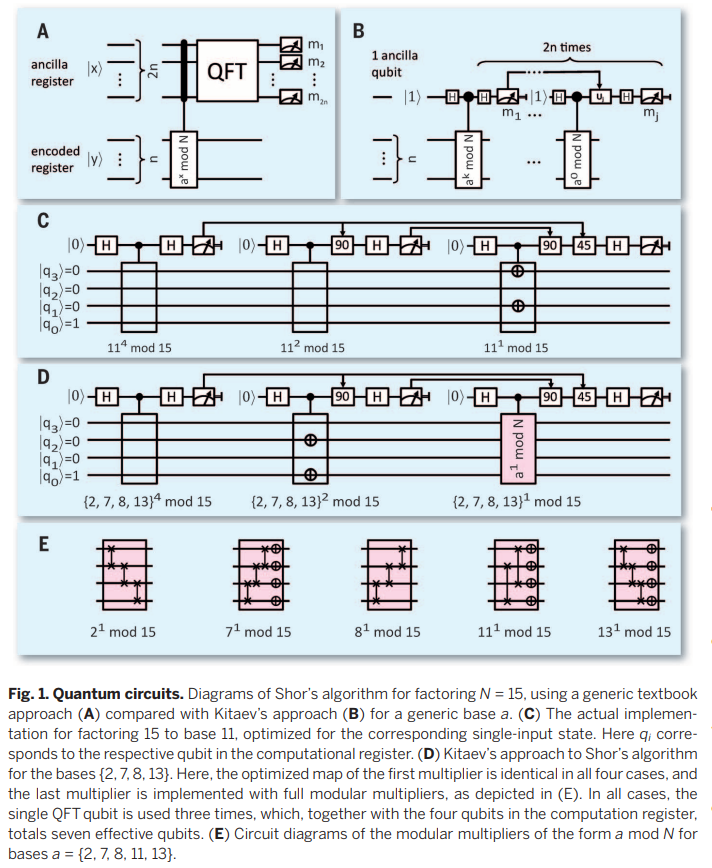

We will be implementing Kitaev's approach for N=15 as that is the most well documented. We will be implementing it only for N-15 due to the complexity required in setting up the code to run shors algorithm using quantum computing.

We will be relying heavily on the paper [**Realization of a scalable Shor algorithm**](https://www.science.org/doi/pdf/10.1126/science.aad9480?casa_token=ewiqpCcOhL0AAAAA:U4vt3KnSRS63pYx9HOXWJoACk2D0MtxCvoVvNwgfW7ES7jmlrqoUvZ8Xm1_A4PXwpWjb04FeydL4ywQ)

To implement Shor's algorithm for N=15 we will:

1. Construct the unitary operator for the different values of x that we know are periodic in N=15 (i.e. 2,4,7,8,11,13,14). We will do this using the circuits in Figure 1 Part E where 4,11,and 14 folllow $11^1 mod 15$ in part E

2. We will implement a QFT in our code through the direct manipulation of gates. Having created the required unitary operators as well as identified the QFT function we will implement a phase estimation function to find the period

3. After using our phase estimation to find the period r we will then implement a continued fractions function and a defined GCD function to solve for p and q

## Imports and Globals

In [ ]:
!pip install xlsxwriter
import xlsxwriter
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
import math
from random import randint
from fractions import Fraction
import os
from qiskit_aer import Aer

Counts = 0
A = 0
Ran_Quantum_period_finding = 0
global m
m = 0



# Create a GCD function

In [59]:
def gcd(a: int, b: int) -> int:
    while a != 0:
        c = a
        a = b % a
        b = c
    return b

## Create the Unitary Operator

The first step is to represent the $a modN$ as a unitary operator. Because we are limiting ourselves to N=15, we know from above that the x's that have a period are 2,4,7,8,11,13,14. So we will condtruct the unitary circuits for those.

In [60]:
def cmod(qc, qr, a_mod_N, a):
# Construct unitary based on a and assumed N=15
  if a == 2:
    qc.cswap(qr[4],qr[3],qr[2])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[1],qr[0])
  if a == 4 or a == 11 or a == 14:
    qc.cswap(qr[4],qr[2],qr[0])
    qc.cswap(qr[4],qr[3],qr[1])
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[1])
    qc.cx(qr[4],qr[0])
  if a == 7:
    qc.cswap(qr[4],qr[1],qr[0])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[3],qr[2])
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[1])
    qc.cx(qr[4],qr[0])
  if a == 8:
    qc.cswap(qr[4],qr[1],qr[0])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[3],qr[2])
  if a == 13:
    qc.cswap(qr[4],qr[3],qr[2])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[1],qr[0])
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[1])
    qc.cx(qr[4],qr[0])


## Function Finder

IN the function finder we do not explicitly create a Quantum Fourier Transform. Instead we implement a form of the QFT by using quantum superposition, controlled operations, and strategic measurements to implement the QFT and inverse QFT  for phase estimation.

We start by initializing the qubits and applying the Hadamard gates to the last qubits to create the superposition states.


We then implement our controlled modular expansion function to encode the eigenvalues into the quantum state's phase

Then we measure the bits using an "inverse QFT" The inverse QFT is usually applied after the controlled operations to transform the phase information encoded in the quantum states into measurable classical bits. We use Hadamard gates followed by measurements to extracting phase information, without implementing the full QFT.

We measure at different stages adn perform conditional phase adjustments to decode the phase information.

The phase estimation also performs the continues fractions at the end until a suitable r is found

In [61]:
def phase_estimation(a, N):
    global R
    n_qubits = 5
    qr = QuantumRegister(n_qubits, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Initialize qr[0] to |1>
    qc.x(qr[0])

    # Apply H-gate to the last qubit
    qc.h(qr[4])

    # Step one: Apply a**4 mod 15
    cmod(qc, qr, a**4 % N,a)
    qc.h(qr[4])
    qc.measure(qr[4], cr[0])
    qc.reset(qr[4])

    # Step two: Apply a**2 mod 15
    qc.h(qr[4])
    # Assuming 'cmod' is applied twice for a**2 mod 15
    for _ in range(2):
        cmod(qc, qr, a**2 % N,a)
    # Conditional phase based on measurement
    if cr[0] == 1:
        qc.p(pi/2, qr[4])
    qc.h(qr[4])
    qc.measure(qr[4], cr[1])
    qc.reset(qr[4])

    # Step three: Apply a mod 15
    qc.h(qr[4])
    cmod(qc, qr, a % N,a)
    if cr[1] == 1:
        qc.p(pi/2, qr[4])
    if cr[0] == 1:
        qc.p(pi/4, qr[4])
    qc.h(qr[4])
    qc.measure(qr[4], cr[2])

    qc.draw(output='mpl', filename='quantum_circuit.png')

    # Execute the circuit on the AerSimulator
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1)
    result = job.result()

    counts = result.get_counts(qc)
    measured_str = list(counts.keys())[0]
    measured_int = int(measured_str, 2)
    print(f"Measured: {measured_int}")

    phi = measured_int / 2**n_qubits

    # Try to find r through continued fraction expansion of phi
    for r in range(1, N+1):
        if Fraction(phi).limit_denominator(N).denominator == r:
            print(f"Period found: {r}")
            return r
    print("No period found.")
    return None

## Factor

To implement this we first determine the number of bits that were needed to represent N, and then check to ensure that N is even

We choose a random a between 2 and N-1 for the phase estimation and compute the GCD of N and 1.

The continued fraction portion happens in the phase estimation and then the factors are calculated


In [62]:
def continued_fractions(N):
	factors = [0,0]
# Step 1 : Determine the number of bits based on N; n = [log2(N)]
	n = math.ceil(math.log(N,2))
# Step 2 : Check if N is even. In that case return 2 and the remaining number as factors
	if N % 2 == 0:
		factors = [2,N/2]
		return factors
# Step 4 : Continued fractions
	while True:
		a = randint(2,N-1)
		global A
		A = a
		t = gcd(N,a)
		if t > 1:
			factors = [t,N/t]
			return factors
		r = phase_estimation(a,N)
		if (r%2 == 0) and (((a**(r/2))+1)%N != 0) and (r != 0) and (r != 8):
			break
		global Counts
		Counts = Counts + 1
	factor_1 = gcd((a**(r/2))+1,N)
	factor_2 = N/factor_1
	factors = [factor_1,factor_2]
	return factors


## Shors Main

Prints out the prime factors as well as exports to a xls file

In [63]:
def main():
    N = 15
    factors_list = []

    # Initialize Excel workbook and worksheet
    wb = xlsxwriter.Workbook('log.xlsx')
    ws = wb.add_worksheet('Data')
    header_format = wb.add_format({'bold': True, 'border': 1})
    border_format = wb.add_format({'border': 1})

    # Write column headers
    headers = ['A', 'Factor 1', 'Factor 2']
    for col, header in enumerate(headers):
        ws.write(0, col, header, header_format)

    for m in range(1, 101):
        factors_found = continued_fractions(N)
        factors_list.append(factors_found)

        # Write the factors found for this run into the Excel sheet
        ws.write(m, 0, A, border_format)
        ws.write(m, 1, factors_found[0], border_format)
        ws.write(m, 2, factors_found[1], border_format)


        print(f"Run {m}: The Number being factorized is {N}")
        print(f"Factors are = {factors_found}")
        print(f"A = {A}")
        print(f"Counts = {Counts}")
        print()

    wb.close()
    print("Results saved to 'log.xlsx'.")

if __name__ == '__main__':
    main()


Run 1: The Number being factorized is 15
Factors are = [5, 3.0]
A = 5
Counts = 0

Measured: 0
Period found: 1
Measured: 5
Period found: 13
Measured: 0
Period found: 1
Run 2: The Number being factorized is 15
Factors are = [5, 3.0]
A = 10
Counts = 3

Run 3: The Number being factorized is 15
Factors are = [3, 5.0]
A = 12
Counts = 3

Run 4: The Number being factorized is 15
Factors are = [3, 5.0]
A = 9
Counts = 3

Run 5: The Number being factorized is 15
Factors are = [5, 3.0]
A = 10
Counts = 3

Measured: 0
Period found: 1
Measured: 7
Period found: 9
Measured: 0
Period found: 1
Measured: 0
Period found: 1
Run 6: The Number being factorized is 15
Factors are = [3, 5.0]
A = 9
Counts = 7

Measured: 0
Period found: 1
Measured: 0
Period found: 1
Measured: 0
Period found: 1
Measured: 5
Period found: 13
Run 7: The Number being factorized is 15
Factors are = [3, 5.0]
A = 6
Counts = 11

Measured: 0
Period found: 1
Run 8: The Number being factorized is 15
Factors are = [3, 5.0]
A = 6
Counts = 12

R

# Attempt at using the Quantum Phase Estimation tool using IBM servers and qiskit QFT function

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_ibm_runtime

In [51]:
token='this is my token'

In [66]:
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from fractions import Fraction
from math import gcd
from qiskit.visualization import plot_histogram, circuit_drawer
from fractions import Fraction
from math import gcd
from random import randint


def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    Args:
        a: Number to multiply by
    Returns:
        QuantumCircuit: Controlled multiplication by a mod 15
    """
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15")
    U = QuantumCircuit(4)
    if a in [2, 13]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    if a in [7, 8]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    if a in [4, 11]:
        U.swap(1, 3)
        U.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True,
            )

    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, output_register)

    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]

    return measurement / 2**precision, qc

psi_prep = QuantumCircuit(4)
psi_prep.x(0)
(psi_prep.draw())

a = randint(1, 14)
N = 15

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND and ATTEMPT < 10:  # Adding a maximum attempt limit to avoid infinite loops
    print(f'Random A is: {a}')
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")

    phase, qc = phase_estimation(
        c_amod15(a),
        psi_prep,
        precision=8
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0 and r % 2 == 0:
        # Guess for a factor is gcd(a^(r/2) - 1, N) and gcd(a^(r/2) + 1, N)
        x_plus = gcd(a ** (r // 2) + 1, N)
        x_minus = gcd(a ** (r // 2) - 1, N)
        # Check if x_plus or x_minus is a factor
        if x_plus not in [1, N]:
            guess = x_plus
        else:
            guess = x_minus

        if guess not in [1, N] and (N % guess) == 0:
            # Guess is a factor!
            other_factor = N // guess  # Calculate the other factor
            print(f"Non-trivial factors found: {guess} and {other_factor}")
            FACTOR_FOUND = True
    if not FACTOR_FOUND:
        print("Factor not found, trying another attempt.")



Random A is: 8

Attempt 1
Non-trivial factors found: 3 and 5


Job ID is cqs0c914x0mg008jfz8g


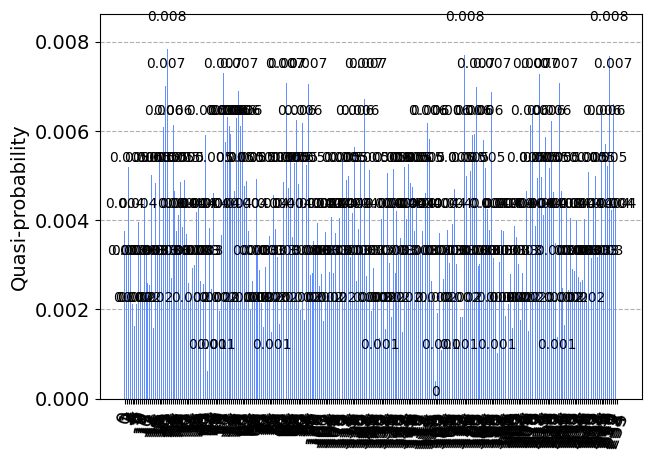

In [55]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
service = QiskitRuntimeService(channel='ibm_quantum', token=token)
backend = service.backend("ibmq_qasm_simulator")

token = ''
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
#run using IBM servers
sampler = Sampler(backend=backend)
sampler.options.default_shots = 2  # Adjust the number of shots as needed
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()

# Display the results
display(plot_histogram(pub_result.quasi_dists))

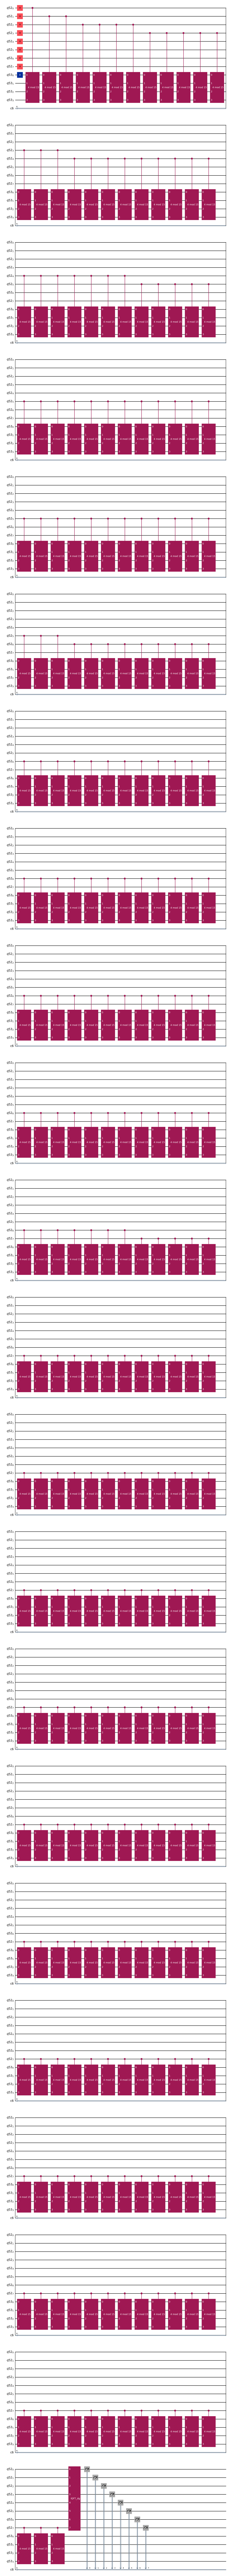

In [56]:
display(qc.draw('mpl'))